## IMPORTING LIBRARIES


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### SKLEARN & BOOSTING MODELS

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

## DATA LOADING AND INITIAL CLEANUP

In [37]:
df =  pd.read_csv(r"C:\Users\Gurleen Kaur\Downloads\osteoporosis.csv")
df.sample(10)

,Id,Age,Gender,Hormonal Changes,Family History,Race/Ethnicity,Body Weight,Calcium Intake,Vitamin D Intake,Physical Activity,Smoking,Alcohol Consumption,Medical Conditions,Medications,Prior Fractures,Osteoporosis
752,1203598,74,Female,Normal,No,African American,Normal,Adequate,Insufficient,Active,No,NaN,Hyperthyroidism,Corticosteroids,No,1
1590,1648315,29,Male,Normal,No,Asian,Normal,Low,Sufficient,Active,Yes,Moderate,Rheumatoid Arthritis,NaN,No,0
1253,1457432,38,Male,Postmenopausal,No,African American,Normal,Low,Sufficient,Active,Yes,Moderate,Hyperthyroidism,NaN,Yes,0
868,1219000,64,Female,Postmenopausal,Yes,African American,Underweight,Adequate,Insufficient,Sedentary,Yes,Moderate,NaN,Corticosteroids,No,1
1221,1872822,19,Female,Postmenopausal,Yes,Caucasian,Normal,Low,Sufficient,Sedentary,No,Moderate,Hyperthyroidism,Corticosteroids,Yes,0
957,1133047,30,Female,Postmenopausal,No,Asian,Underweight,Adequate,Sufficient,Sedentary,No,Moderate,NaN,Corticosteroids,No,1
1298,1305062,19,Male,Normal,Yes,Caucasian,Normal,Adequate,Sufficient,Sedentary,Yes,Moderate,NaN,NaN,Yes,0
1524,1279231,29,Female,Postmenopausal,Yes,African American,Normal,Low,Insufficient,Active,Yes,NaN,Rheumatoid Arthritis,Corticosteroids,Yes,0
516,1774985,80,Female,Normal,No,African American,Normal,Low,Insufficient,Active,No,Moderate,NaN,NaN,Yes,1
200,1295330,56,Male,Normal,No,African American,Underweight,Adequate,Insufficient,Sedentary,No,Moderate,Rheumatoid Arthritis,NaN,No,1


## 🦴 Osteoporosis Risk Factor Descriptions (Feature Explanation)

### **Id**
A unique identifier for each individual in the dataset.

### **Age**
Age of the individual.  
Bone density naturally decreases as age increases, making age one of the strongest predictors of osteoporosis risk.

### **Gender**
Gender significantly influences osteoporosis risk.  
Women are at higher risk than men, especially after menopause due to hormonal changes.

### **Hormonal Changes**
Refers to changes such as menopause in women.  
These changes reduce estrogen levels, which accelerates bone loss.

### **Family History**
Indicates whether close family members have had osteoporosis or fractures.  
A family history increases genetic predisposition to reduced bone density.

### **Race/Ethnicity**
Different racial and ethnic groups show varying baseline bone densities and fracture risks due to genetic, nutritional, and lifestyle differences.

### **Body Weight**
Lower body weight is often associated with lower bone density, increasing osteoporosis risk.  
Adequate body mass generally supports healthier bone strength.

### **Calcium Intake**
Calcium is essential for strong bones.  
Insufficient calcium intake can lead to reduced bone mineral density and higher osteoporosis risk.

### **Vitamin D Intake**
Vitamin D helps in calcium absorption.  
Low vitamin D levels impair calcium uptake and weaken bones.

### **Physical Activity**
Regular weight-bearing exercises improve bone strength.  
Low physical activity increases the likelihood of bone loss over time.

### **Smoking**
Smoking negatively affects bone metabolism and reduces bone density.  
It is a well-known risk factor for osteoporosis.

### **Alcohol Consumption**
Excessive alcohol intake interferes with bone formation and calcium absorption, increasing osteoporosis risk.

### **Medical Conditions**
Certain conditions—such as rheumatoid arthritis, thyroid disorders, and gastrointestinal diseases—can impair bone health.

### **Medications**
Long-term use of corticosteroids, anti-seizure drugs, and some hormonal treatments can weaken bones and elevate osteoporosis risk.

### **Prior Fractures**
A history of fractures indicates existing bone weakness.  
Individuals with prior fractures are at higher risk of future osteoporotic fractures.

### **Osteoporosis**
This column indicates whether the individual **has osteoporosis or not**.  
It serves as the **target variable** for the risk prediction model.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [36]:
for col in df.columns:
    if df[col].dtype == 'object':       # correct dtype check
        print(f"\nColumn: {col}")
        print(df[col].value_counts())   


Column: Gender
Gender
Male      991
Female    963
Name: count, dtype: int64

Column: Hormonal Changes
Hormonal Changes
Normal            978
Postmenopausal    976
Name: count, dtype: int64

Column: Family History
Family History
No     996
Yes    958
Name: count, dtype: int64

Column: Race/Ethnicity
Race/Ethnicity
African American    681
Caucasian           645
Asian               628
Name: count, dtype: int64

Column: Body Weight
Body Weight
Normal         1026
Underweight     928
Name: count, dtype: int64

Column: Calcium Intake
Calcium Intake
Low         1002
Adequate     952
Name: count, dtype: int64

Column: Vitamin D Intake
Vitamin D Intake
Sufficient      1009
Insufficient     945
Name: count, dtype: int64

Column: Physical Activity
Physical Activity
Active       1019
Sedentary     935
Name: count, dtype: int64

Column: Smoking
Smoking
Yes    981
No     973
Name: count, dtype: int64

Column: Alcohol Consumption
Alcohol Consumption
No_Alcohol    988
Moderate      966
Name: count,

In [5]:
df = df.drop(columns=('Id'))

In [6]:
df.describe()

,Age,Osteoporosis
count,1958.000000,1958.000000
mean,39.101124,0.500000
std,21.355424,0.500128
min,18.000000,0.000000
25%,21.000000,0.000000
50%,32.000000,0.500000
75%,53.000000,1.000000
max,90.000000,1.000000


In [7]:
#checking null values
df.isnull().sum()

Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

In [8]:
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna('No_Alcohol')
df['Medical Conditions'] = df['Medical Conditions'].fillna('None')
df['Medications'] = df['Medications'].fillna('None')
df.isnull().sum()

Age                    0
Gender                 0
Hormonal Changes       0
Family History         0
Race/Ethnicity         0
Body Weight            0
Calcium Intake         0
Vitamin D Intake       0
Physical Activity      0
Smoking                0
Alcohol Consumption    0
Medical Conditions     0
Medications            0
Prior Fractures        0
Osteoporosis           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(4)

In [10]:
df.drop_duplicates(inplace =True)
df.duplicated().sum()

np.int64(0)

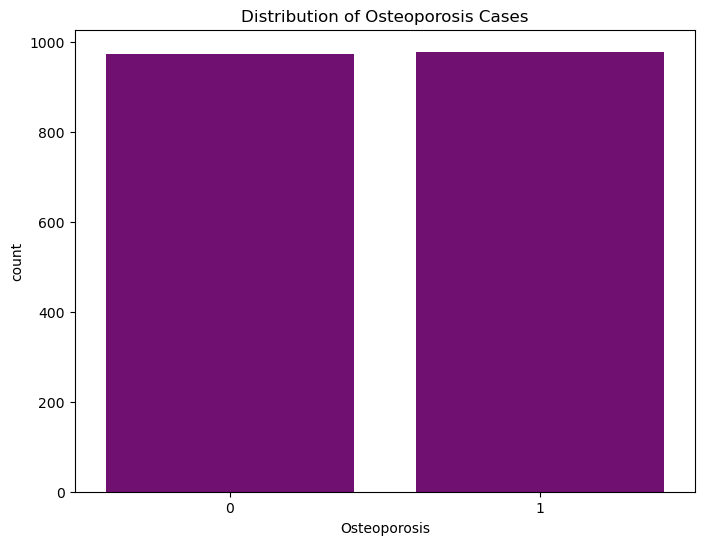

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Osteoporosis', data=df, color='purple')
plt.title('Distribution of Osteoporosis Cases')
plt.show()

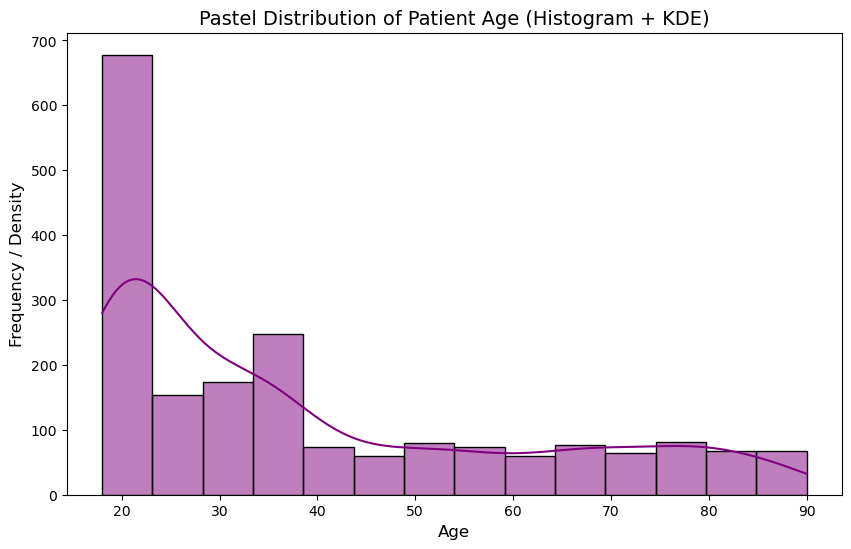

In [14]:
# Plot 1: Histogram + KDE
plt.figure(figsize=(10, 6))
# The histplot includes both the histogram bars and the Kernel Density Estimate (KDE) curve by default
sns.histplot(df['Age'], kde=True,  color='purple')
plt.title('Pastel Distribution of Patient Age (Histogram + KDE)', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency / Density', fontsize=12)
plt.show()

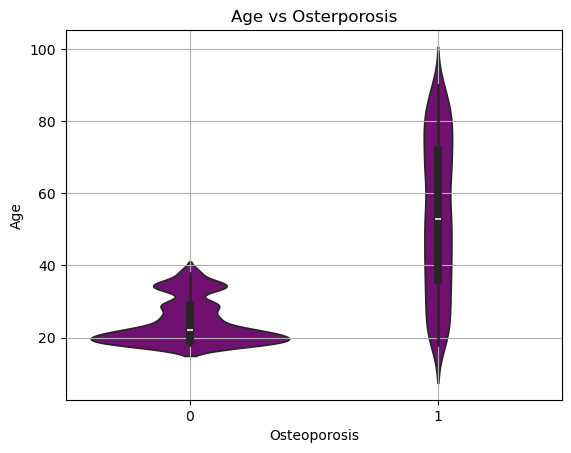

In [15]:
sns.violinplot(data = df, x = df['Osteoporosis'], y=df['Age'],  color='purple')
plt.title("Age vs Osterporosis")
plt.grid()
plt.show()

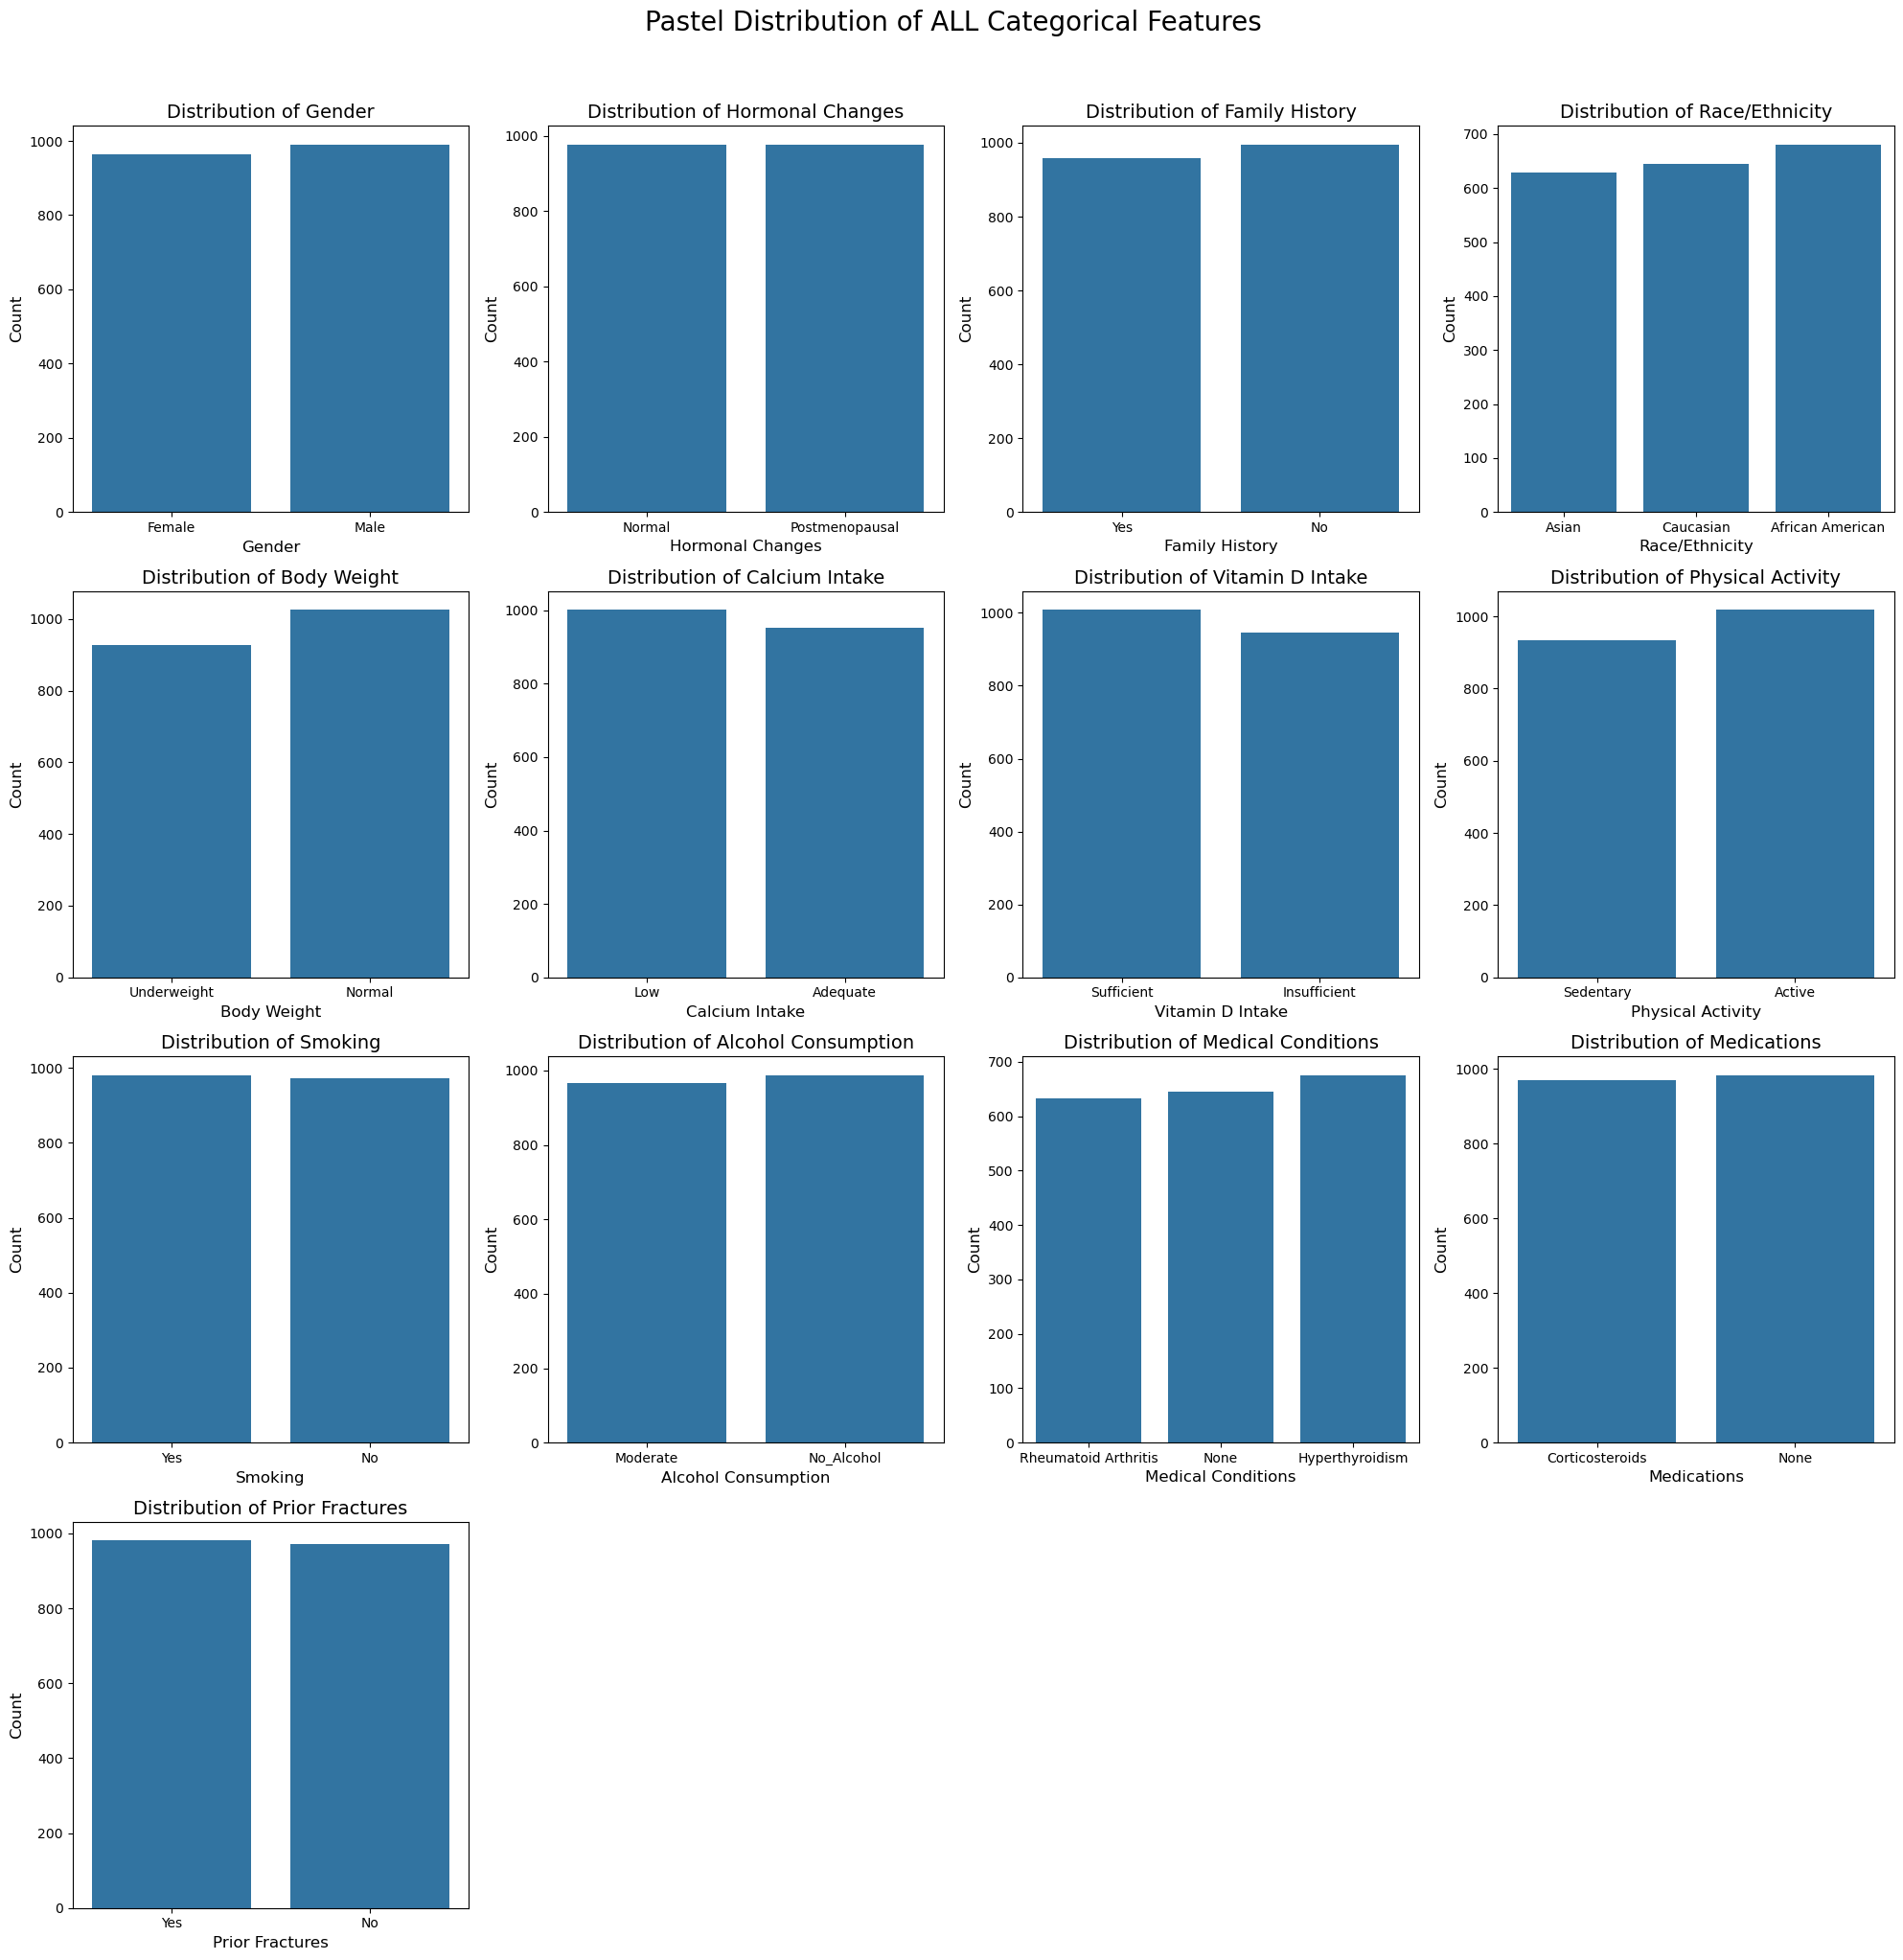

In [16]:
all_categorical_cols = [
    'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity', 
    'Body Weight', 'Calcium Intake', 'Vitamin D Intake', 'Physical Activity', 
    'Smoking', 'Alcohol Consumption', 'Medical Conditions', 'Medications', 
    'Prior Fractures'
]
# 2. Set up the plotting area (4x4 grid for 14 plots)
fig, axes = plt.subplots(4, 4, figsize=(20, 20)) # Changed to 4x4
axes = axes.flatten() 

plt.suptitle('Pastel Distribution of ALL Categorical Features', fontsize=20, y=1.02)

# 3. Create the Countplots
for i, col in enumerate(all_categorical_cols):
    sns.countplot(x=col, data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)

# 4. Hide the unused axes (14 plots on a 16-plot grid means 2 unused axes)
for i in range(len(all_categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

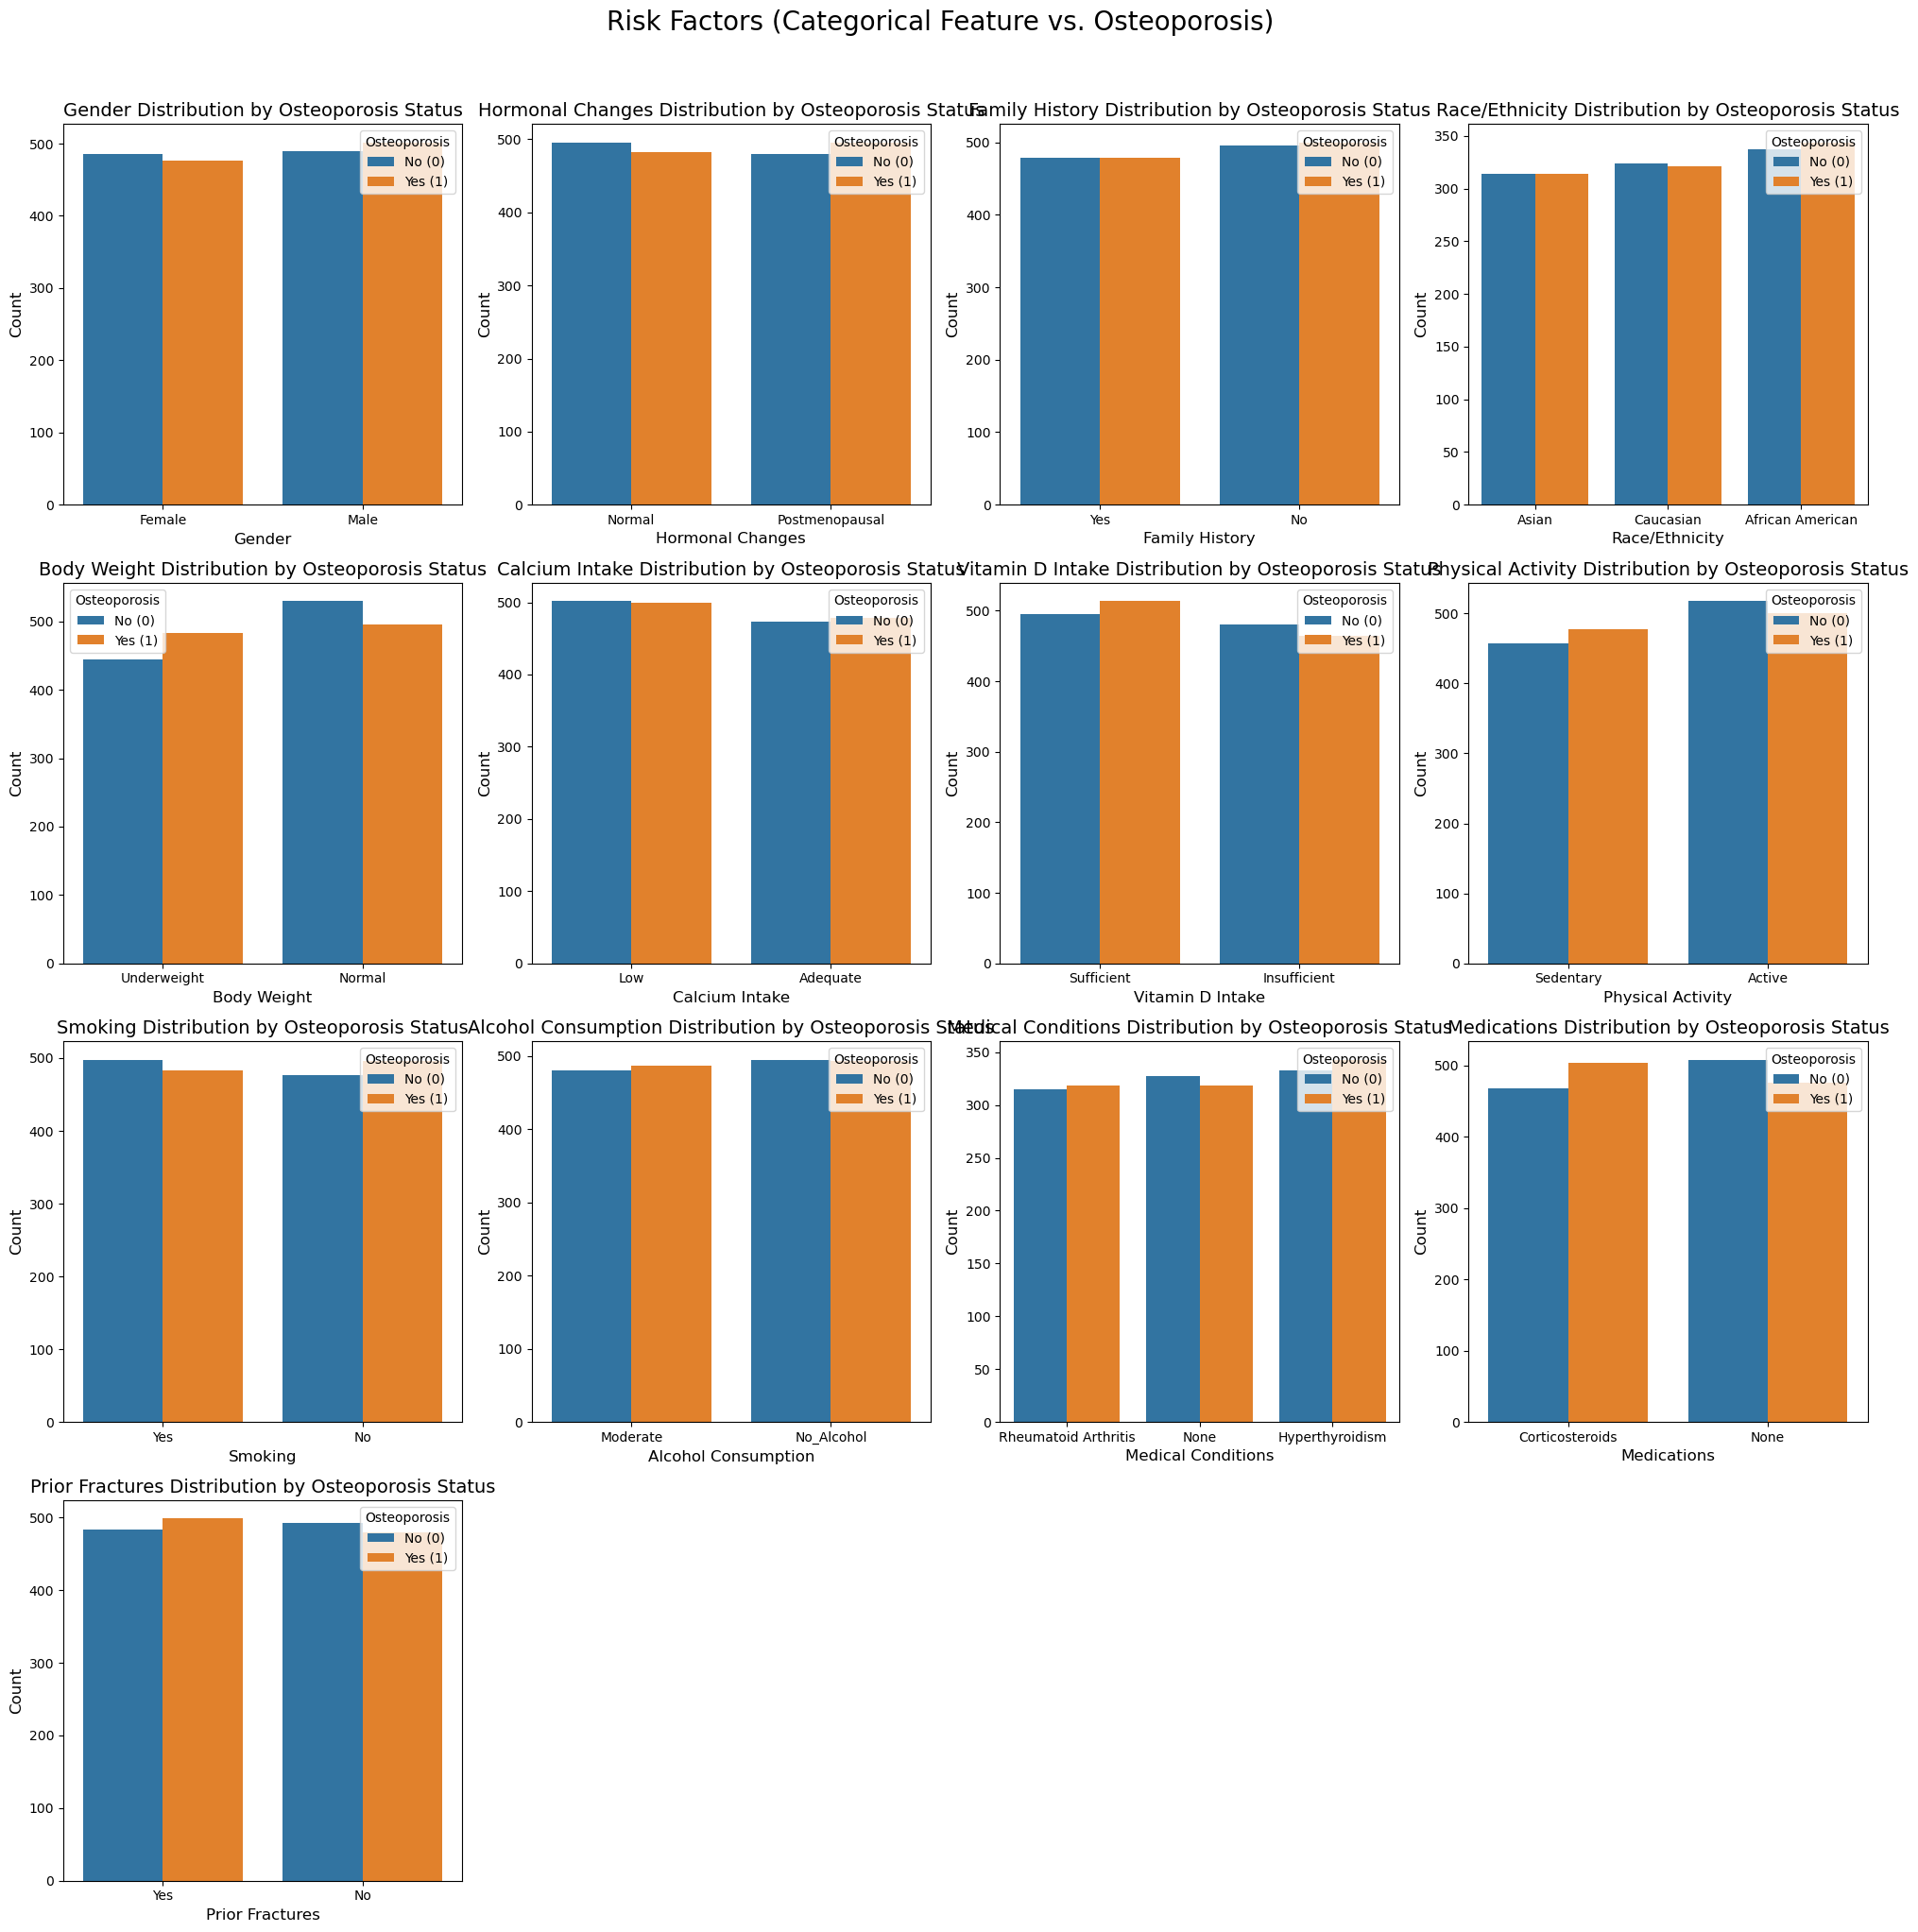

In [17]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20)) # Adjusted to 4x4 (16 total slots)
axes = axes.flatten()
plot_axes = axes[:len(all_categorical_cols)]

plt.suptitle('Risk Factors (Categorical Feature vs. Osteoporosis)', fontsize=20, y=1.02)

# 3. Create the Bivariate Countplots
for i, col in enumerate(all_categorical_cols):
    sns.countplot(x=col, hue='Osteoporosis', data=df, ax=plot_axes[i])
    plot_axes[i].set_title(f'{col} Distribution by Osteoporosis Status', fontsize=14)
    plot_axes[i].set_xlabel(col, fontsize=12)
    plot_axes[i].set_ylabel('Count', fontsize=12)
    plot_axes[i].legend(title='Osteoporosis', labels=['No (0)', 'Yes (1)'])

# 4. Hide the unused axes (13 plots on a 16-slot grid means 3 unused axes)
for i in range(len(all_categorical_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
# 🔍 Class Imbalance within Features: You instantly see if a feature is heavily skewed.
# For example, if the Smoking plot shows $95\%$ non-smokers and $5\%$ smokers, you know this feature is imbalanced.
# This affects how you might encode or sample the feature later.
# 🩺 Population Profile: You confirm the patient population's general profile. 
# For Race/Ethnicity, you see which group is most numerous in your data.
# For Body Weight, you see the distribution across the two categories (e.g., normal/underweight vs. overweight/obese).
# ✅ Data Quality Check: If you see any unexpected categories (e.g., a '5' appearing in a binary 0/1 column) or if one category has a suspiciously 
# low or high count, it might signal a data entry error that needs cleaning.

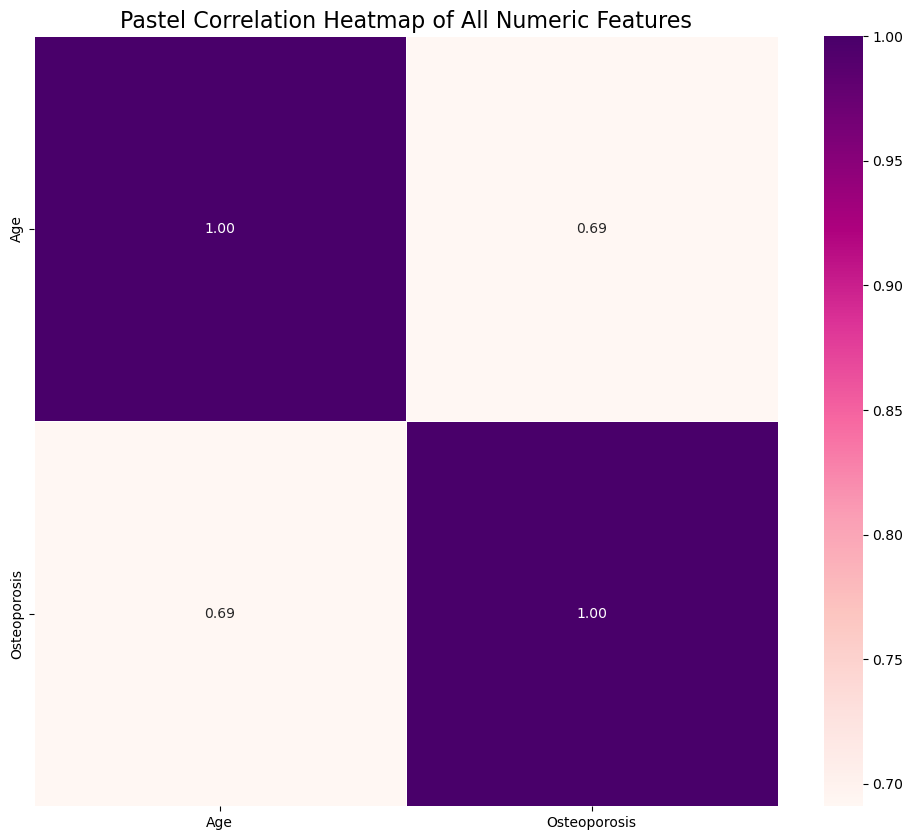

In [18]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 10))
# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,          # Show the correlation values on the map
    fmt=".2f",           # Format annotations to two decimal places
    cmap="RdPu",         # Using a soft pink/purple colormap that fits a pastel theme
    linewidths=.5,       # Add lines to separate cells
    cbar=True            # Show the color bar
)
plt.title('Pastel Correlation Heatmap of All Numeric Features', fontsize=16)
plt.show()

## PREPROCESSING FUNCTIONS (SPLIT, ENCODE, SCALE)

#### SPLITTING

In [19]:
def split_data(df, target='Osteoporosis', test_size=0.2):
    """Splits data into training/testing sets with stratification."""
    X = df.drop(columns=[target])
    y = df[target]
    return train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

#### ENCODING

In [20]:
def apply_label_encoding(X_train, X_test, cat_features):
    """Applies Label Encoding to categorical features after splitting."""
    X_train_enc = X_train.copy()
    X_test_enc = X_test.copy()
    
    for col in cat_features:
        le = LabelEncoder()
        # Ensure NaNs are treated as a category before encoding
        X_train_enc[col] = le.fit_transform(X_train[col].astype(str).fillna("NaN_Value"))
        X_test_enc[col] = le.transform(X_test[col].astype(str).fillna("NaN_Value"))
        
    return X_train_enc, X_test_enc

#### SCALING

In [21]:
def apply_scaling(X_train_enc, X_test_enc):
    """Applies StandardScaler to all features for scaling-sensitive models."""
    scaler = StandardScaler()
    X_train_scaled = X_train_enc.copy()
    X_test_scaled = X_test_enc.copy()
    
    features_to_scale = X_train_enc.columns.tolist()
    
    X_train_scaled[features_to_scale] = scaler.fit_transform(X_train_enc[features_to_scale])
    X_test_scaled[features_to_scale] = scaler.transform(X_test_enc[features_to_scale])
    
    return X_train_scaled, X_test_scaled

## MODEL TRAINING AND EVALUATION

In [22]:
def train_and_evaluate(model, X_tr, X_te, y_tr, y_te):
    """Trains a model and returns essential classification metrics."""
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_te)

    # Determine AUC based on available prediction methods
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_te)[:, 1]
        auc = roc_auc_score(y_te, y_proba)
    elif hasattr(model, "decision_function"):
        y_proba = model.decision_function(X_te)
        auc = roc_auc_score(y_te, y_proba)
    else:
        auc = np.nan

    return {
        "Accuracy": accuracy_score(y_te, y_pred),
        "Precision": precision_score(y_te, y_pred, zero_division=0),
        "Recall": recall_score(y_te, y_pred, zero_division=0),
        "F1-Score": f1_score(y_te, y_pred, zero_division=0),
        "AUC-ROC": auc
    }

## MAIN EXECUTION BLOCK

In [25]:
CAT_FEATURES = df.select_dtypes(include='object').columns.tolist()

In [27]:
# Splitting
X_train, X_test, y_train, y_test = split_data(df)

In [28]:
# 3. Preprocessing Variants
X_train_enc, X_test_enc = apply_label_encoding(X_train, X_test, CAT_FEATURES)
X_train_scaled, X_test_scaled = apply_scaling(X_train_enc, X_test_enc)

In [29]:
# 4. Model Definitions
# (Using the same definitions from your working code)
encode_only_models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=300, class_weight="balanced"),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=300),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42, n_estimators=300),
    "XGBoost": XGBClassifier(eval_metric="logloss", n_estimators=300, random_state=42, scale_pos_weight=np.sum(y_train == 0) / np.sum(y_train == 1)),
}
scaled_models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, class_weight="balanced"),
    "SVM": SVC(probability=True, class_weight="balanced"),
    "KNN": KNeighborsClassifier(),
}
catboost_model = CatBoostClassifier(verbose=0, random_state=42, n_estimators=300, cat_features=CAT_FEATURES, auto_class_weights="Balanced")

In [30]:
# 5. Training Loop
final_results = {}
final_results["CatBoost"] = train_and_evaluate(catboost_model, X_train, X_test, y_train, y_test)

for name, model in encode_only_models.items():
    final_results[name] = train_and_evaluate(model, X_train_enc, X_test_enc, y_train, y_test)

for name, model in scaled_models.items():
    final_results[name] = train_and_evaluate(model, X_train_scaled, X_test_scaled, y_train, y_test)

In [33]:
# 6. Display Results
metrics_df = pd.DataFrame(final_results).T.round(4)
print(metrics_df.sort_values(by="AUC-ROC", ascending=False).to_markdown())

|                     |   Accuracy |   Precision |   Recall |   F1-Score |   AUC-ROC |
|:--------------------|-----------:|------------:|---------:|-----------:|----------:|
| CatBoost            |     0.8849 |      1      |   0.7704 |     0.8703 |    0.9005 |
| XGBoost             |     0.8568 |      0.9023 |   0.801  |     0.8486 |    0.8869 |
| AdaBoost            |     0.8772 |      1      |   0.7551 |     0.8605 |    0.8856 |
| Gradient Boosting   |     0.8721 |      0.9562 |   0.7806 |     0.8596 |    0.8806 |
| Random Forest       |     0.8389 |      0.9586 |   0.7092 |     0.8152 |    0.8793 |
| Logistic Regression |     0.8031 |      0.8563 |   0.7296 |     0.7879 |    0.8757 |
| SVM                 |     0.8235 |      0.9379 |   0.6939 |     0.7977 |    0.8731 |
| Decision Tree       |     0.8107 |      0.8144 |   0.8061 |     0.8103 |    0.8108 |
| KNN                 |     0.711  |      0.7546 |   0.6276 |     0.6852 |    0.7738 |
